In [1]:
#import all the things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read the advertising.csv data and name it. 
ad_data = pd.read_csv('advertising.csv')

In [4]:
#Take a look at the data given. 
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


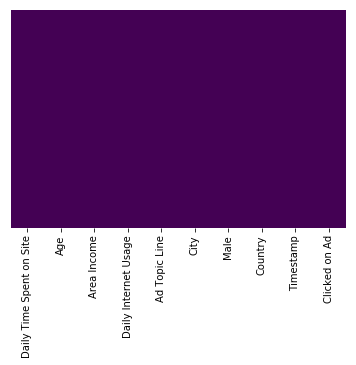

In [8]:
#Using a heatmap to check and see if there is any missing information. 
sns.heatmap(ad_data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

C:\Users\jpkli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


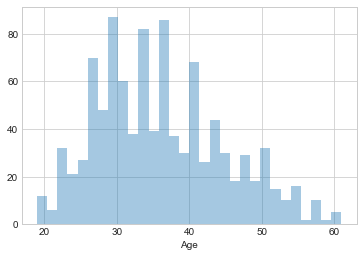

In [59]:
#Taking a look to see correlations between categories and people clicking on the ad.
#Exploration time. 
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'],kde = False, bins = 30)

C:\Users\jpkli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jpkli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


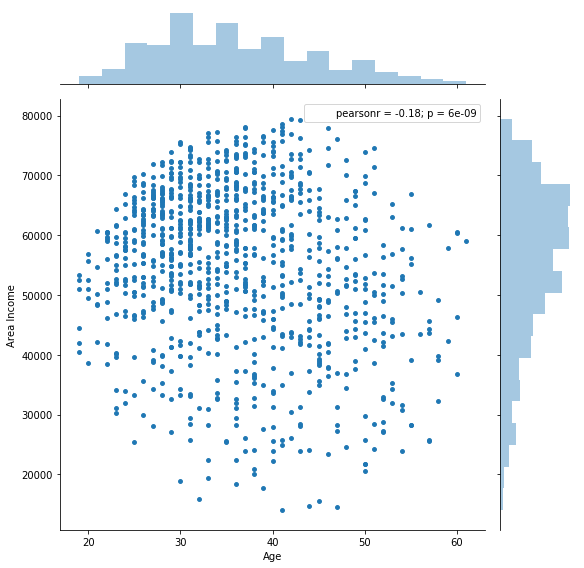

In [29]:
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data, kind = 'scatter', s = 15,size = 8)

C:\Users\jpkli\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 's'
  s)


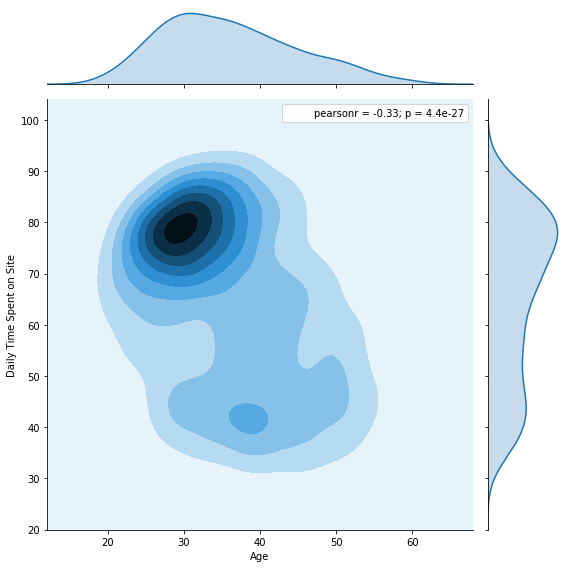

In [31]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = ad_data, kind = 'kde', s = 15,size = 8)

C:\Users\jpkli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jpkli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


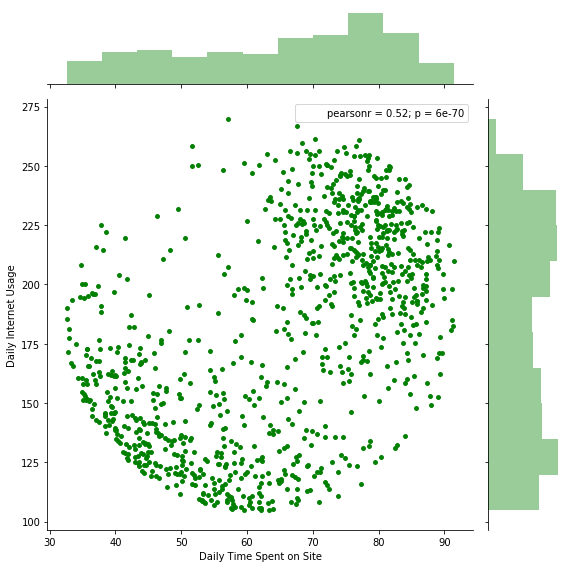

In [34]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = ad_data, kind = 'scatter', s = 15,size = 8, color = 'Green')

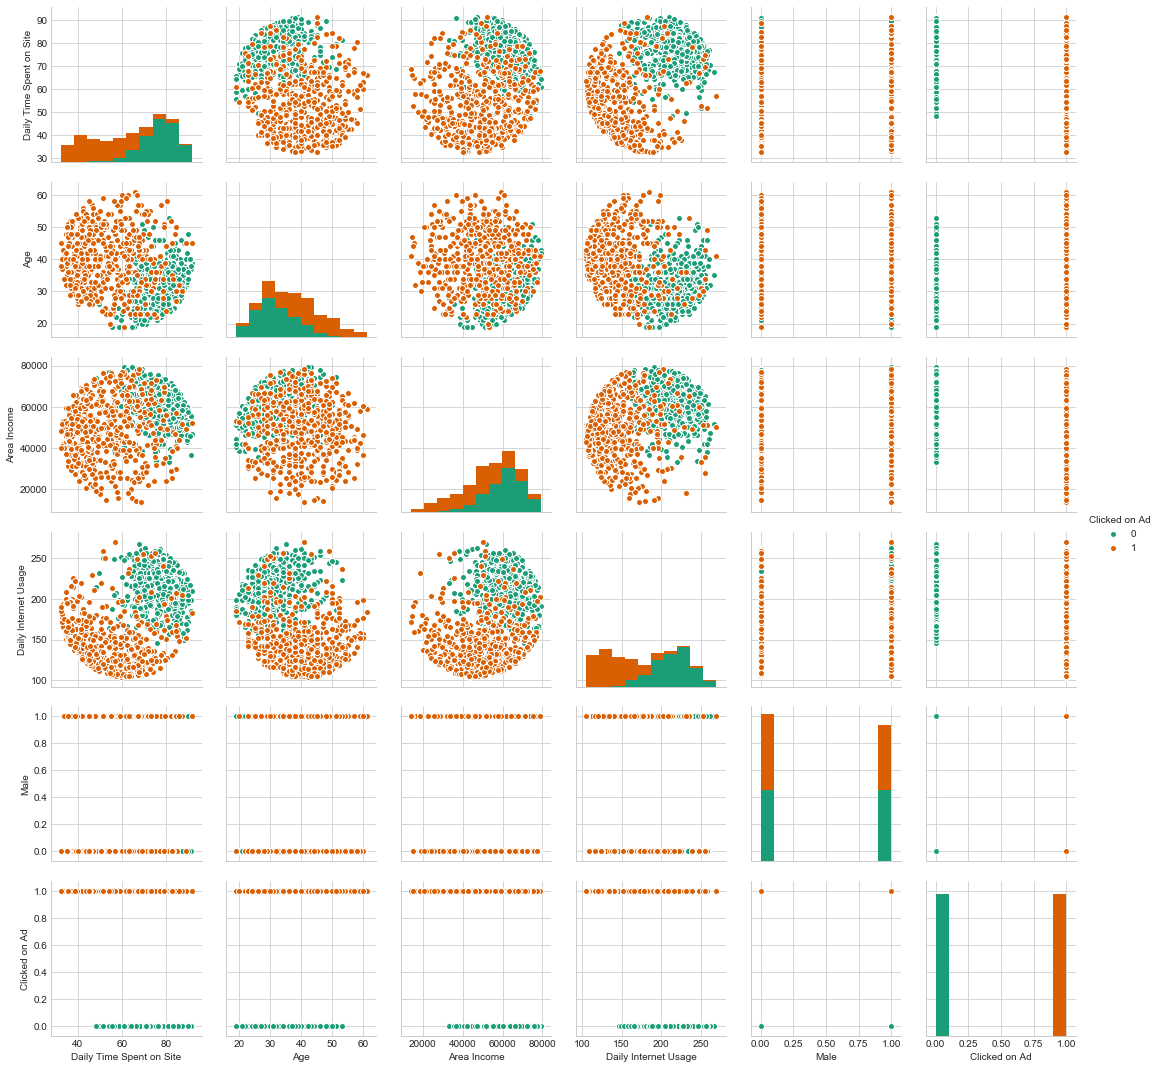

In [166]:
sns.pairplot(ad_data, hue = 'Clicked on Ad',palette = 'Dark2')

In [ ]:
#Here I could drop columns that I do not care about, and make the data more concise. Come back to this if time permits. 

## Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split


In [57]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [133]:
#Still need some clarification here, after exploring the data, how to choose which data I'd like to use. 
X = ad_data[['Daily Time Spent on Site','Age','Male','Daily Internet Usage','Area Income']]
y = ad_data['Clicked on Ad']

In [141]:
#Look this up again in book again. 
#random_state is just specifiying a particular random state, the number itself.
#The value is only there to state which random state we used. 
#Test size is the proportion of the data to use in the test split. How do we decide on this value? 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logmodel = LogisticRegression()

In [144]:
#Using x and y train.
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions

In [150]:
#Using x test.
predictions = logmodel.predict(X_test)

In [151]:
from sklearn.metrics import classification_report

In [152]:
#Using y test. 
#Look this up again, what do these values represent?
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92       179
          1       0.93      0.88      0.90       151

avg / total       0.92      0.92      0.91       330

